In [1]:
# class imabalance = >> wehn one has higher percentage 

In [3]:
#how to handle the class imbalance 
# upsampling 
# downsamilping 
# SMOTE

In [2]:
import pandas as pd
import numpy as np

In [7]:
np.random.seed(1) # reproducibility of result 

In [9]:
no_sample = 1000
class_0_ratio = 0.9
no_class_0 = int(no_sample*class_0_ratio)

In [13]:
no_class_0

900

In [15]:
no_class_1 = 100

In [17]:
# now the class is imbalanced since class 1 has 90% and class 1 is 10%

In [35]:
class_0= {'feature1' : np.random.normal(0,1,no_class_0),
         'feature3' : np.random.normal(0,1,no_class_0),
         'target' : [0]*no_class_0}

In [37]:
class_0 = pd.DataFrame(class_0)

In [39]:
class_0

,feature1,feature3,target
0,-0.105813,-1.321513,0
1,0.040865,0.599902,0
2,1.172449,-0.678348,0
3,-0.821600,0.508945,0
4,-0.779938,0.538265,0
...,...,...,...
895,1.610881,-0.125903,0
896,1.055869,-0.960346,0
897,-1.118320,-0.843913,0
898,-0.777175,0.628342,0


In [31]:
class_1= pd.DataFrame({'feature1' : np.random.normal(3,1,no_class_1),
         'feature3' : np.random.normal(0,1,no_class_1),
         'target' : [1]*no_class_1})

In [33]:
class_1

,feature1,feature3,target
0,3.489517,0.482598,1
1,3.238796,-1.105432,1
2,2.551888,0.420755,1
3,2.389205,1.616794,1
4,0.970055,-0.883771,1
...,...,...,...
95,3.268527,-0.708655,1
96,2.844950,-0.872502,1
97,5.112622,-1.093790,1
98,3.256079,-1.534700,1


In [49]:
# combine both data 

df = pd.concat([class_0,class_1]).reset_index()

In [55]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [57]:
df

,index,feature1,feature3,target
0,0,-0.105813,-1.321513,0
1,1,0.040865,0.599902,0
2,2,1.172449,-0.678348,0
3,3,-0.821600,0.508945,0
4,4,-0.779938,0.538265,0
...,...,...,...,...
995,95,3.268527,-0.708655,1
996,96,2.844950,-0.872502,1
997,97,5.112622,-1.093790,1
998,98,3.256079,-1.534700,1


In [59]:
#UPSMAPLING 

In [61]:
df_minority = df[df.target ==1]
df_majority = df[df.target == 0]

In [63]:
df_majority


,index,feature1,feature3,target
0,0,-0.105813,-1.321513,0
1,1,0.040865,0.599902,0
2,2,1.172449,-0.678348,0
3,3,-0.821600,0.508945,0
4,4,-0.779938,0.538265,0
...,...,...,...,...
895,895,1.610881,-0.125903,0
896,896,1.055869,-0.960346,0
897,897,-1.118320,-0.843913,0
898,898,-0.777175,0.628342,0


In [65]:
df_minority

,index,feature1,feature3,target
900,0,3.489517,0.482598,1
901,1,3.238796,-1.105432,1
902,2,2.551888,0.420755,1
903,3,2.389205,1.616794,1
904,4,0.970055,-0.883771,1
...,...,...,...,...
995,95,3.268527,-0.708655,1
996,96,2.844950,-0.872502,1
997,97,5.112622,-1.093790,1
998,98,3.256079,-1.534700,1


In [67]:
#replace >> if replace is true then data points can be repeated

In [75]:
from sklearn.utils import resample 
df_minority_upsampled = resample(df_minority , replace = True, n_samples = len(df_majority) , random_state = 1)

In [77]:
df_minority_upsampled

,index,feature1,feature3,target
937,37,4.310159,-0.324332,1
912,12,4.496995,-0.232603,1
972,72,3.033929,0.681402,1
909,9,2.213597,-1.044998,1
975,75,4.054868,0.625218,1
...,...,...,...,...
936,36,2.154805,2.208662,1
998,98,3.256079,-1.534700,1
901,1,3.238796,-1.105432,1
932,32,3.666244,0.919447,1


In [81]:
df_upsampeld = pd.concat([df_majority , df_minority_upsampled])

In [85]:
df_upsampeld

,index,feature1,feature3,target
0,0,-0.105813,-1.321513,0
1,1,0.040865,0.599902,0
2,2,1.172449,-0.678348,0
3,3,-0.821600,0.508945,0
4,4,-0.779938,0.538265,0
...,...,...,...,...
936,36,2.154805,2.208662,1
998,98,3.256079,-1.534700,1
901,1,3.238796,-1.105432,1
932,32,3.666244,0.919447,1


In [87]:
df_upsampeld.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

# downsampling 

In [91]:
df.shape

(1000, 4)

In [94]:
df_majority

,index,feature1,feature3,target
0,0,-0.105813,-1.321513,0
1,1,0.040865,0.599902,0
2,2,1.172449,-0.678348,0
3,3,-0.821600,0.508945,0
4,4,-0.779938,0.538265,0
...,...,...,...,...
895,895,1.610881,-0.125903,0
896,896,1.055869,-0.960346,0
897,897,-1.118320,-0.843913,0
898,898,-0.777175,0.628342,0


In [100]:
df_downsample = resample(df_majority , replace = False , n_samples = len(df_minority) , random_state = 1 )

In [106]:
df_downsample = pd.concat([df_minority , df_downsample])

In [122]:
df_downsample = df_downsample.reset_index(drop= True)

In [118]:
df_downsample.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [124]:
df_downsample

,index,feature1,feature3,target
0,0,3.489517,0.482598,1
1,1,3.238796,-1.105432,1
2,2,2.551888,0.420755,1
3,3,2.389205,1.616794,1
4,4,0.970055,-0.883771,1
...,...,...,...,...
195,494,0.483665,-0.579190,0
196,255,0.764502,0.766948,0
197,672,0.088282,1.590844,0
198,481,-1.305833,-0.964620,0


# SMOTE 

In [129]:
from sklearn.datasets import  make_classification

In [135]:
x,y = make_classification(n_samples = 1000 , n_redundant=0 , n_features=2 , n_clusters_per_class= 1,
                    weights= [0.90])

In [163]:
x

array([[-0.04349352,  1.02308564],
       [ 1.24221801, -1.36009496],
       [ 0.80148618, -0.80867155],
       ...,
       [-0.24473732,  1.42357277],
       [ 1.19038819,  0.5639105 ],
       [ 1.54218702,  0.68079843]])

In [ ]:
df1 = pd

In [161]:
y

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [145]:
df1 = pd.DataFrame(x, columns = ['f1' ,'f2'])

In [147]:
df1

,f1,f2
0,-0.043494,1.023086
1,1.242218,-1.360095
2,0.801486,-0.808672
3,0.249611,1.430360
4,0.253883,1.566578
...,...,...
995,0.187647,1.350411
996,1.024112,0.979190
997,-0.244737,1.423573
998,1.190388,0.563911


In [149]:
df2 = pd.DataFrame(y, columns = ['target'])

In [151]:
df3 =

,target
0,0
1,1
2,1
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [165]:
df3 = pd.concat([df1 , df2] , axis = 1)

In [167]:
df3

,f1,f2,target
0,-0.043494,1.023086,0
1,1.242218,-1.360095,1
2,0.801486,-0.808672,1
3,0.249611,1.430360,0
4,0.253883,1.566578,0
...,...,...,...
995,0.187647,1.350411,0
996,1.024112,0.979190,0
997,-0.244737,1.423573,0
998,1.190388,0.563911,0


In [169]:
import matplotlib.pyplot as plt

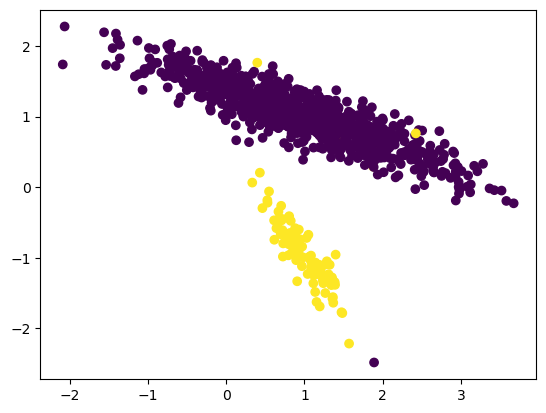

In [171]:
plt.scatter(df3['f1'] , df3['f2'] , c = df3['target'])

In [173]:
!pip install imblearn

In [177]:
from imblearn.over_sampling import SMOTE

In [179]:
oversample = SMOTE()

In [183]:
x,y = oversample.fit_resample(df3[['f1' ,'f2']] , df3['target']  )

In [185]:
x.shape

(1792, 2)

In [187]:
y.shape

(1792,)

In [189]:
df1 = pd.DataFrame(x, columns = ['f1' ,'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
smote_data = pd.concat([df1 , df2] , axis = 1)

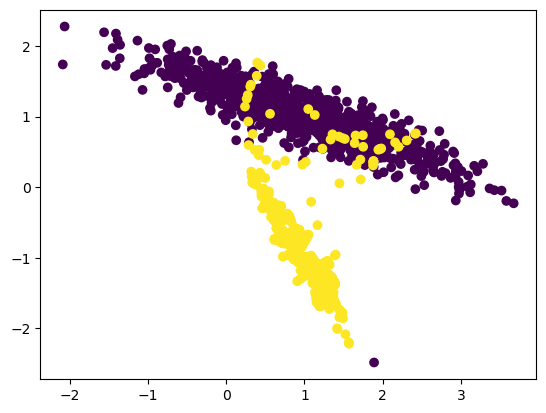

In [193]:
plt.scatter(smote_data['f1'] , smote_data['f2'] , c = smote_data['target'])

In [195]:
smote_data

,f1,f2,target
0,-0.043494,1.023086,0
1,1.242218,-1.360095,1
2,0.801486,-0.808672,1
3,0.249611,1.430360,0
4,0.253883,1.566578,0
...,...,...,...
1787,1.112916,-1.191272,1
1788,0.865129,-0.857687,1
1789,0.943447,-0.749579,1
1790,1.251572,-1.090636,1
